In [1]:
import pandas as pd

df = pd.read_csv('financial_fraud_detection_dataset.csv')
df.head()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22T09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,False,NaN,NaN,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04T01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,False,NaN,NaN,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12T11:39:33.742963,ACC733052,ACC377370,2773.86,deposit,other,London,pos,False,NaN,NaN,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10T06:04:43.195112,ACC996865,ACC344098,1666.22,deposit,online,Sydney,pos,False,NaN,NaN,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24T08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,False,NaN,NaN,0.79,13,0.27,ACH,108.161.108.255,D7637601


In [2]:
print("Colunm Names")
print(df.columns.tolist())

Colunm Names
['transaction_id', 'timestamp', 'sender_account', 'receiver_account', 'amount', 'transaction_type', 'merchant_category', 'location', 'device_used', 'is_fraud', 'fraud_type', 'time_since_last_transaction', 'spending_deviation_score', 'velocity_score', 'geo_anomaly_score', 'payment_channel', 'ip_address', 'device_hash']


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), float64(4), int64(1), object(1

In [5]:
df.isnull().sum()

transaction_id                       0
timestamp                            0
sender_account                       0
receiver_account                     0
amount                               0
transaction_type                     0
merchant_category                    0
location                             0
device_used                          0
is_fraud                             0
fraud_type                     4820447
time_since_last_transaction     896513
spending_deviation_score             0
velocity_score                       0
geo_anomaly_score                    0
payment_channel                      0
ip_address                           0
device_hash                          0
dtype: int64

In [6]:
df['fraud_type'] = df['fraud_type'].fillna('None')
df['time_since_last_transaction'] = df['time_since_last_transaction'].fillna(0)


In [7]:
df.duplicated().count()

np.int64(5000000)

In [11]:
df.drop_duplicates()
print(len(df))

5000000


In [12]:
print(df.dtypes)

transaction_id                  object
timestamp                       object
sender_account                  object
receiver_account                object
amount                         float64
transaction_type                object
merchant_category               object
location                        object
device_used                     object
is_fraud                          bool
fraud_type                      object
time_since_last_transaction    float64
spending_deviation_score       float64
velocity_score                   int64
geo_anomaly_score              float64
payment_channel                 object
ip_address                      object
device_hash                     object
dtype: object


In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed', errors='coerce')
categorial_col = ['transaction_type', 'merchant_category', 'device_used', 'fraud_type', 'payment_channel']
for col in categorial_col:
        df[col] = df[col].astype('category')
        
df['is_fraud'] = df['is_fraud'].astype(int)


    

In [17]:
print(df.dtypes)

transaction_id                         object
timestamp                      datetime64[ns]
sender_account                         object
receiver_account                       object
amount                                float64
transaction_type                     category
merchant_category                    category
location                               object
device_used                          category
is_fraud                                int64
fraud_type                           category
time_since_last_transaction           float64
spending_deviation_score              float64
velocity_score                          int64
geo_anomaly_score                     float64
payment_channel                      category
ip_address                             object
device_hash                            object
dtype: object


In [20]:
df['timestamp'].isna()

0          False
1          False
2          False
3          False
4          False
           ...  
4999995    False
4999996    False
4999997    False
4999998    False
4999999    False
Name: timestamp, Length: 5000000, dtype: bool

In [21]:
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt

In [31]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['amount'] < Q1 - 1.5 * IQR) | (df['amount'] > Q3 + 1.5 * IQR)]
print(outliers)

        transaction_id                  timestamp sender_account  \
2              T100002 2023-05-12 11:39:33.742963      ACC733052   
3              T100003 2023-10-10 06:04:43.195112      ACC996865   
10             T100010 2023-08-04 00:35:03.745267      ACC717024   
14             T100014 2023-03-11 13:30:19.142152      ACC161324   
15             T100015 2023-05-29 03:04:25.786373      ACC358175   
...                ...                        ...            ...   
4999949       T5099949 2023-06-30 07:25:20.100074      ACC430670   
4999954       T5099954 2023-03-20 01:24:14.552053      ACC253124   
4999955       T5099955 2023-07-28 19:10:38.265289      ACC382001   
4999966       T5099966 2023-04-20 16:06:45.861113      ACC995598   
4999978       T5099978 2023-06-01 21:30:06.500795      ACC278933   

        receiver_account   amount transaction_type merchant_category  \
2              ACC377370  2773.86          deposit             other   
3              ACC344098  1666.22      

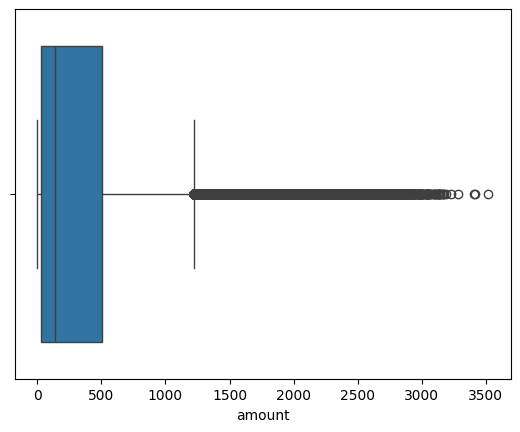

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['amount'])
plt.show()

In [33]:
lower = df['amount'].quantile(0.05)
upper = df['amount'].quantile(0.95)
df['amount'] = df['amount'].clip(lower, upper)

In [34]:
df.head()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
0,T100000,2023-08-22 09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,0,None,0.0,-0.21,3,0.22,card,13.101.214.112,D8536477
1,T100001,2023-08-04 01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,0,None,0.0,-0.14,7,0.96,ACH,172.52.47.194,D2622631
2,T100002,2023-05-12 11:39:33.742963,ACC733052,ACC377370,1420.39,deposit,other,London,pos,0,None,0.0,-1.78,20,0.89,card,185.98.35.23,D4823498
3,T100003,2023-10-10 06:04:43.195112,ACC996865,ACC344098,1420.39,deposit,online,Sydney,pos,0,None,0.0,-0.60,6,0.37,wire_transfer,107.136.36.87,D9961380
4,T100004,2023-09-24 08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,0,None,0.0,0.79,13,0.27,ACH,108.161.108.255,D7637601


In [35]:
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df['weekday'] = df['timestamp'].dt.weekday

In [36]:
df.head()

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,...,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash,hour,day,month,year,weekday
0,T100000,2023-08-22 09:22:43.516168,ACC877572,ACC388389,343.78,withdrawal,utilities,Tokyo,mobile,0,...,3,0.22,card,13.101.214.112,D8536477,9,22,8,2023,1
1,T100001,2023-08-04 01:58:02.606711,ACC895667,ACC944962,419.65,withdrawal,online,Toronto,atm,0,...,7,0.96,ACH,172.52.47.194,D2622631,1,4,8,2023,4
2,T100002,2023-05-12 11:39:33.742963,ACC733052,ACC377370,1420.39,deposit,other,London,pos,0,...,20,0.89,card,185.98.35.23,D4823498,11,12,5,2023,4
3,T100003,2023-10-10 06:04:43.195112,ACC996865,ACC344098,1420.39,deposit,online,Sydney,pos,0,...,6,0.37,wire_transfer,107.136.36.87,D9961380,6,10,10,2023,1
4,T100004,2023-09-24 08:09:02.700162,ACC584714,ACC497887,24.43,transfer,utilities,Toronto,mobile,0,...,13,0.27,ACH,108.161.108.255,D7637601,8,24,9,2023,6


In [37]:
df.to_csv('clean_fraud_data.csv')